## 1. Module Import

In [1]:
# self defined Modules
from myModules.plot.plotWordCloud import plotWordCloud
from myModules.plot.plotNetwork import vocaDict, Network
from myModules.TopicModeling.ldaModeling import buildDTM, topicWords, visualizeLDA, BestLDAPram

# General Modules
import pandas as pd
import numpy as np
import warnings
import pickle

warnings.filterwarnings('ignore')

# NLP
from gensim import models

## 2. Data Load

In [2]:
DATA_ROOT = './processed-data/chosun/'

RESULT_ROOT = './Result/chosun/'

In [3]:
with open(DATA_ROOT+"lemmatized-all.pkl", "rb") as f:
    all = pickle.load(f)
with open(DATA_ROOT+"lemmatized-noun.pkl", "rb") as f:
    noun = pickle.load(f)
with open(DATA_ROOT+"lemmatized-verb.pkl", "rb") as f:
    verb = pickle.load(f)
with open(DATA_ROOT+"lemmatized-adjective.pkl", "rb") as f:
    adjective = pickle.load(f)
with open(DATA_ROOT+"lemmatized-adverb.pkl", "rb") as f:
    adverb = pickle.load(f)

## 3. Analysis

### 3-1. Word Cloud

#### All pos

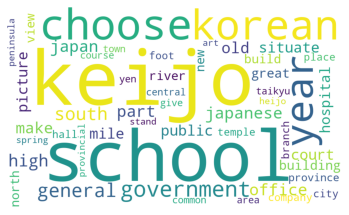

In [4]:
plotWordCloud(*all, filepath=RESULT_ROOT+'all-', mode='ST')

#### Noun

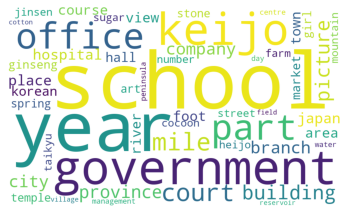

In [5]:
plotWordCloud(*noun, filepath=RESULT_ROOT+'noun-', mode='ST')

#### Verb

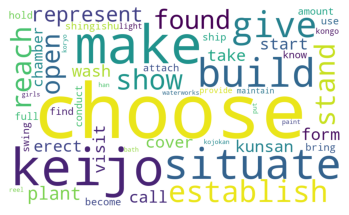

In [6]:
plotWordCloud(*verb, filepath=RESULT_ROOT+'verb-', mode='ST')

#### Adjective

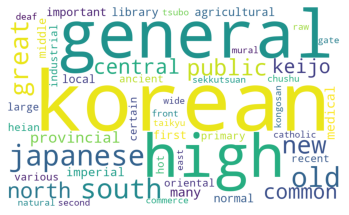

In [7]:
plotWordCloud(*adjective, filepath=RESULT_ROOT+'adjective-', mode='ST')

#### Adverb

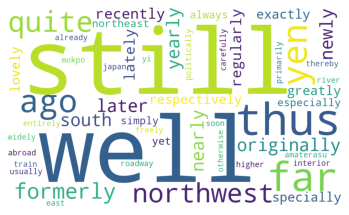

In [8]:
plotWordCloud(*adverb, filepath=RESULT_ROOT+'adverb-', mode='ST')

### 3-2. Topic Modeling

#### Parameter

In [9]:
NUM_TOPIC_WORDS = 30
random_state = 42

#### Test Parameter Combination

In [10]:
lda_param = BestLDAPram(data=all, random_state=random_state)

In [11]:
num_topics = range(1, 10)
alpha = list(np.arange(0.001, 0.01, 0.001))
eta = list(np.arange(0.01, 0.1, 0.01))

param_grid = {
    'num_topics' : num_topics,
    'alpha' : alpha,
    'eta' : eta
}

In [13]:
df = pd.read_csv('word-pair-freq-noun.csv')

In [14]:
df

,word1,word2,freq
0,america,war,1260855
1,america,army,884154
2,america,state,821618
3,america,year,805542
4,america,people,742515
...,...,...,...
55108,position,coup,1
55109,monument,principle,1
55110,degree,monument,1
55111,victor,south,1


In [15]:
param = 'word1'
df[param].unique()

array(['america', 'germany', 'army', ..., 'marshal', 'rodion', 'monument'],
      dtype=object)

In [12]:
lda_param.param_search(param_grid=param_grid)

Testing Parameter Combination:   0%|          | 0/729 [00:00<?, ?it/s]

TypeError: list indices must be integers or slices, not str

#### Plot Coherence Graph about Topic Number

In [ ]:
lda_param.plot_coherence_per_topics()

#### Plot Coherence Graph about Alpha

In [ ]:
lda_param.plot_coherence_per_alpha()

#### Plot Coherence Graph about Eta

In [ ]:
lda_param.plot_coherence_per_eta()

#### Get Best Parameter

In [ ]:
NUM_TOPICS, ALPHA, ETA = lda_param.get_best_params()

#### Topic Modeling With Best Parameter

In [ ]:
Corp, Dict = buildDTM(all)

model = models.ldamodel.LdaModel(corpus=Corp, id2word=Dict, \
    num_topics=NUM_TOPICS, alpha=ALPHA, eta=ETA, random_state=random_state)

topicdf = topicWords(model, NUM_TOPIC_WORDS)
topicdf.to_csv(RESULT_ROOT+'topic words.csv', index=False)

data = visualizeLDA(model, Corp, Dict)

data

### 3-3. Network Web Analysis

#### Define Voca Calculator & Network Visualizer

#### Calculate Word Pair Frequency

In [ ]:
voca = vocaDict()
result = voca.calcWordPairFreq(*all)
voca.to_csv(file_name="all", root=RESULT_ROOT)

voca = vocaDict()
result = voca.calcWordPairFreq(*noun)
voca.to_csv(file_name="noun", root=RESULT_ROOT)

voca = vocaDict()
result = voca.calcWordPairFreq(*verb)
voca.to_csv(file_name="verb", root=RESULT_ROOT)

voca = vocaDict()
result = voca.calcWordPairFreq(*adjective)
voca.to_csv(file_name="adjective", root=RESULT_ROOT)

voca = vocaDict()
result = voca.calcWordPairFreq(*adverb)
voca.to_csv(file_name="adverb", root=RESULT_ROOT)

In [ ]:
all_freq = pd.read_csv(RESULT_ROOT+'word-pair-freq-all.csv')
noun_freq = pd.read_csv(RESULT_ROOT+'word-pair-freq-noun.csv')
verb_freq = pd.read_csv(RESULT_ROOT+'word-pair-freq-verb.csv')
adjective_freq = pd.read_csv(RESULT_ROOT+'word-pair-freq-adjective.csv')
adverb_freq = pd.read_csv(RESULT_ROOT+'word-pair-freq-adverb.csv')

#### All Pos

In [ ]:
net = Network()

# '단어 중심성' 계산
# degree Centrality, Page Rank
net.calc_properties(edge_num=30, data=all_freq)

# Network 시각화
net.plot(title='All Pos Network Web Analysis', root=RESULT_ROOT)

#### Noun

In [ ]:
net = Network()

# '단어 중심성' 계산
# degree Centrality, Page Rank
net.calc_properties(edge_num=30, data=noun_freq)

# Network 시각화
net.plot(title='Noun Network Web Analysis', root=RESULT_ROOT)

#### Verb

In [ ]:
net = Network()

# '단어 중심성' 계산
# degree Centrality, Page Rank
net.calc_properties(edge_num=30, data=verb_freq)

# Network 시각화
net.plot(title='Verb Network Web Analysis', root=RESULT_ROOT)

#### Adjective

In [ ]:
net = Network()

# '단어 중심성' 계산
# degree Centrality, Page Rank
net.calc_properties(edge_num=30, data=adjective_freq)

# Network 시각화
net.plot(title='adjective Network Web Analysis', root=RESULT_ROOT)

#### Adverb

In [ ]:
net = Network()

# '단어 중심성' 계산
# degree Centrality, Page Rank
net.calc_properties(edge_num=30, data=adverb_freq)

# Network 시각화
net.plot(title='adverb Network Web Analysis', root=RESULT_ROOT)